## Loading the dataset using pandas

In [94]:
import pandas as pd
df = pd.read_csv("/content/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The dataset contains 2 columns

In [95]:
df.shape

(5573, 2)

Dataset contains 5573 rows and 2 columns

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


It doesnt contains any missing values

In [97]:
df.isnull().sum()

,0
Category,0
Message,0


In [98]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747
"{""mode"":""full""",1


As we can see there is an unknown extra value - let's remove it

In [99]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


It is present in the last row of the dataset

In [100]:
df = df.drop(5572)
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [101]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


## Now it looks clean

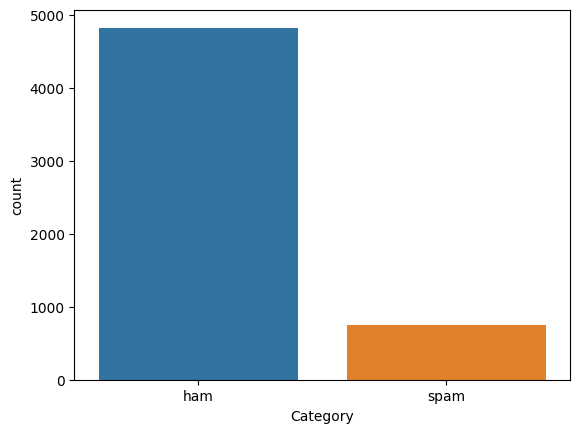

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='Category', hue='Category')
plt.show()

We could clearly see that there are more ham messages than spam - clearly a case of class imbalance

In [103]:
df.columns = ['label', 'text']

Renaming the columns for better readability

In [104]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

Enocode the categorical label columns to numerical

In [105]:
df['label'].value_counts()

,count
label,
0,4825
1,747


Dataset contains some duplicate rows lets remove it

In [106]:
print("Duplicate rows: ", df.duplicated().sum())
print("NA values:", df.isnull().sum())

Duplicate rows:  415
NA values: label    0
text     0
dtype: int64


In [107]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [108]:
print("Duplicate rows: ", df.duplicated().sum())

Duplicate rows:  0


Duplicates has been removed

In [109]:
df.shape

(5157, 2)

## Text Pre-processing

In [110]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)                     # remove numbers
    text = re.sub(r'[^\w\s]', '', text)                 # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()            # remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [111]:
df.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## TF-IDF Vectorizer

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [113]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31721 stored elements and shape (5157, 2000)>
  Coords	Values
  (0, 1289)	0.3397967263571453
  (0, 322)	0.3364036572775416
  (0, 83)	0.3364036572775416
  (0, 172)	0.36731862804898685
  (0, 639)	0.24460128944731185
  (0, 1951)	0.3132888811082843
  (0, 890)	0.3563444292954185
  (0, 246)	0.36731862804898685
  (0, 632)	0.20366087175360742
  (0, 1868)	0.24883443828234655
  (1, 1195)	0.2801036067015438
  (1, 900)	0.40950399139362686
  (1, 857)	0.5267060090475922
  (1, 1915)	0.4331809286460229
  (1, 1198)	0.5373858145094657
  (2, 558)	0.16980678993261636
  (2, 478)	0.525840440625346
  (2, 1933)	0.28847440106352906
  (2, 287)	0.28847440106352906
  (2, 1919)	0.22207785435705607
  (2, 331)	0.2926691278060581
  (2, 536)	0.27233158587774003
  (2, 1582)	0.23532389547836688
  (2, 1665)	0.17935311522347824
  (2, 1375)	0.24473526104343396
  :	:
  (5152, 453)	0.2238272195160394
  (5152, 1737)	0.24978253021456387
  (5152, 1319)	0.244331308385

In [114]:
for idx in range(10):
    print(f"Column {idx}: {feature_names[idx]}")

Column 0: abiola
Column 1: able
Column 2: abt
Column 3: accept
Column 4: access
Column 5: account
Column 6: account statement
Column 7: activate
Column 8: actually
Column 9: ad


In [115]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5157, dtype: int64


## Train test split - using stratify (as we need to treat the class imbalance)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
# Check class balance in the full dataset
print("Full dataset:")
print(y.value_counts(normalize=True))

# Check class balance in training data
print("\nTraining set:")
print(y_train.value_counts(normalize=True))

# Check class balance in test data
print("\nTest set:")
print(y_test.value_counts(normalize=True))

Full dataset:
label
0    0.875703
1    0.124297
Name: proportion, dtype: float64

Training set:
label
0    0.875636
1    0.124364
Name: proportion, dtype: float64

Test set:
label
0    0.875969
1    0.124031
Name: proportion, dtype: float64


As we can see the the messages are now in a proper propostion

## Model Selection - Naive Bayes (Multinomial)

In [118]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9777131782945736
[[904   0]
 [ 23 105]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       1.00      0.82      0.90       128

    accuracy                           0.98      1032
   macro avg       0.99      0.91      0.94      1032
weighted avg       0.98      0.98      0.98      1032



Got 97% Accuracy

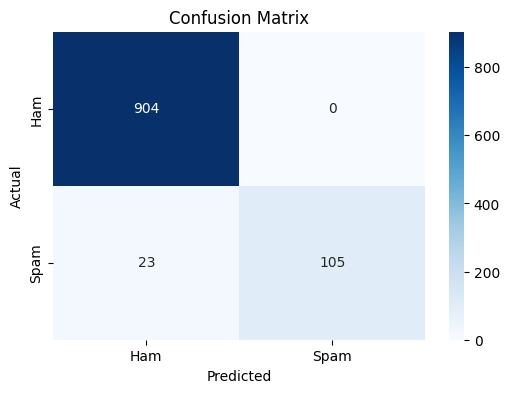

In [120]:
# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']  # adjust if using different labels

# Step 3: Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Let's test with some sample messages

In [123]:
new_messages = [
    "Hey, are we still meeting today?",
    "You've been selected for a free cruise to Bahamas!",
    "Call me when you're free.",
]

X_new = vectorizer.transform(new_messages)
preds = model.predict(X_new)

# Show results
for msg, label in zip(new_messages, preds):
    print(f"Message: '{msg}' --> Prediction: {'Spam' if label == 1 else 'Ham'}")

Message: 'Hey, are we still meeting today?' --> Prediction: Ham
Message: 'You've been selected for a free cruise to Bahamas!' --> Prediction: Spam
Message: 'Call me when you're free.' --> Prediction: Ham


In [124]:
test_message = ["Hey, just checking in — your number came up in our system for a free upgrade, let me know if you're interested."]
X_test = vectorizer.transform(test_message)
prediction = model.predict(X_test)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")

Prediction: Ham


In [126]:
prediction_probabilities = model.predict_proba(X_test)
spam_probability = prediction_probabilities[0][1]
print("Spam Probability:", spam_probability)

Spam Probability: 0.012262855441963785
